# Tarea 3 - Decenso del gradiente

## Nicolás Echeverri Rojas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
def decensoGradiente(initial,x,y,epoch,alpha):
    
    theta0,theta1= initial 
    m=len(x)
    
    MAE=[]
    MSE=[]
    MAPE=[]
    
    for i in range(0,epoch):
        
        h=theta1*x + theta0
        
        theta0=theta0-alpha/m *sum( h-y )
        theta1=theta1-alpha/m *sum( (h-y)*x )
        
        MSE.append( 1/m * sum( (h-y)**2 ) )
        MAE.append( 1/m * sum( abs(h-y) ) )
        MAPE.append( 100/m * sum( abs( (h-y)/y ) ) )
        
    return theta0,theta1,MAE,MSE,MAPE 
        

In [3]:
datos=pd.read_csv("data.csv",header=None)
datos.columns=['X','Y']

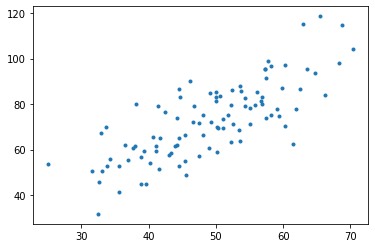

In [4]:
plt.plot(datos['X'],datos['Y'],".")

In [5]:
initial=[10,10]
x=np.array(datos['X'])
y=np.array(datos['Y'])

Theta0,Theta1,MAE,MSE,MAPE =decensoGradiente(initial,x,y,epoch=100,alpha=0.0001);

In [6]:
print("Los valores finales son Theta0: %2f y Theta1: %f" % (Theta0,Theta1) )

Los valores finales son Theta0: 9.828042 y Theta1: 1.286325


### Usando curve_fit

In [7]:
from scipy.optimize import curve_fit

In [8]:
p0=[10,10]

popt, pcov = curve_fit(lambda x,a0,a1 : a1*x+a0, x, y, p0, method='lm')
perr = np.sqrt(np.diag(pcov))

print("Los valores finales usando curve-fit son Theta0: %2f ± %2f y Theta1: %2f ± %2f" % (popt[0],perr[0] ,popt[1],perr[1] ) )

Los valores finales usando curve-fit son Theta0: 7.991021 ± 5.459003 y Theta1: 1.322431 ± 0.109378


Text(0.5, 0, 'iteración')

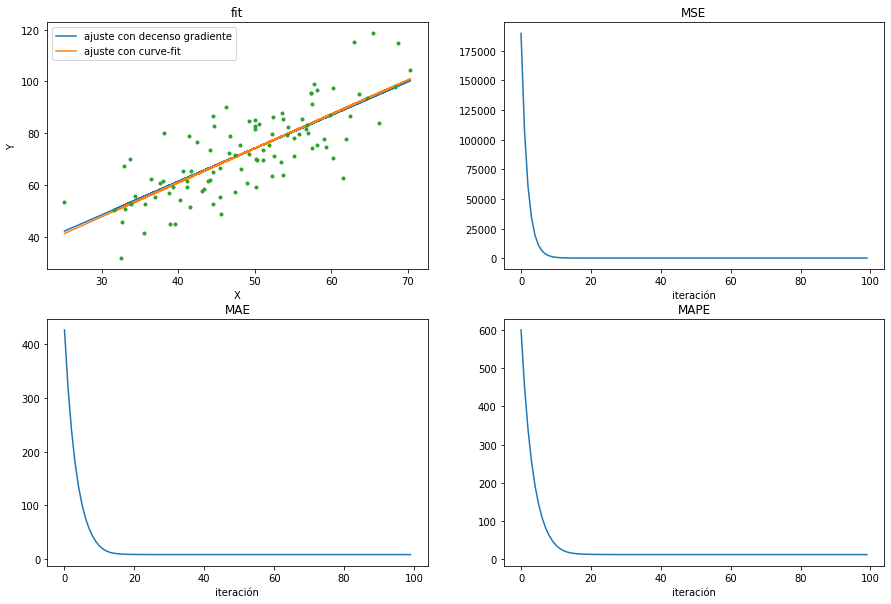

In [9]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(x,x*Theta1+Theta0, label='ajuste con decenso gradiente')
ax[0,0].plot(x,x*popt[1]+popt[0], label='ajuste con curve-fit')
ax[0,0].plot(x,y,".")
ax[0,0].set_title("fit")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")
ax[0,0].legend()

ax[1,0].plot(MAE)
ax[1,0].set_title("MAE")
ax[1,0].set_xlabel("iteración")

ax[0,1].plot(MSE)
ax[0,1].set_title("MSE")
ax[0,1].set_xlabel("iteración")

ax[1,1].plot(MAPE)
ax[1,1].set_title("MAPE")
ax[1,1].set_xlabel("iteración")

## Probando con diferentes $\alpha$

### $\alpha=0.00007$

Los valores finales son Theta0: 9.828250 y Theta1: 1.286321


Text(0.5, 0, 'iteración')

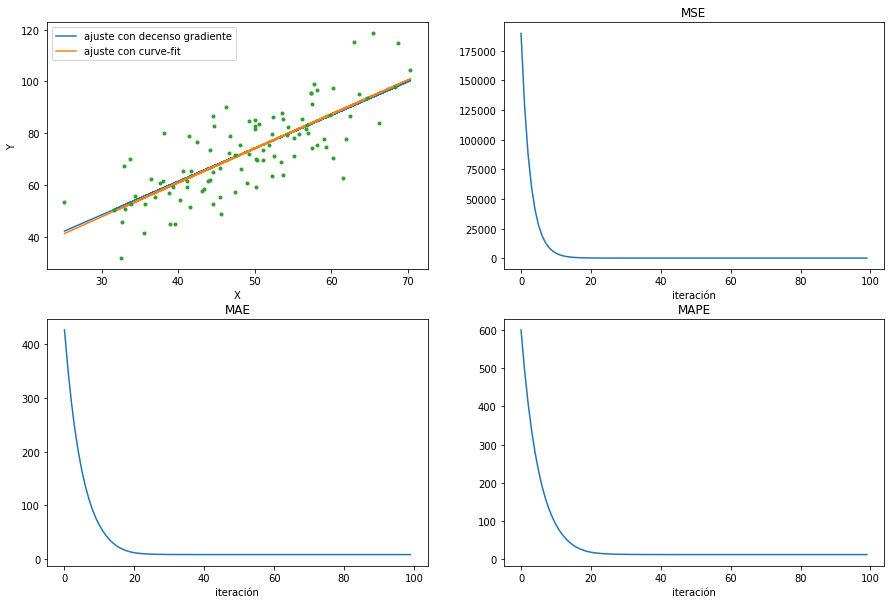

In [10]:
initial=[10,10]
x=np.array(datos['X'])
y=np.array(datos['Y'])

Theta0,Theta1,MAE,MSE,MAPE =decensoGradiente(initial,x,y,epoch=100,alpha=0.00007);

print("Los valores finales son Theta0: %2f y Theta1: %f" % (Theta0,Theta1) )

fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(x,x*Theta1+Theta0, label='ajuste con decenso gradiente')
ax[0,0].plot(x,x*popt[1]+popt[0], label='ajuste con curve-fit')
ax[0,0].plot(x,y,".")
ax[1,0].set_title("fit")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")
ax[0,0].legend()

ax[1,0].plot(MAE)
ax[1,0].set_title("MAE")
ax[1,0].set_xlabel("iteración")

ax[0,1].plot(MSE)
ax[0,1].set_title("MSE")
ax[0,1].set_xlabel("iteración")

ax[1,1].plot(MAPE)
ax[1,1].set_title("MAPE")
ax[1,1].set_xlabel("iteración")

### $\alpha=0.001$

Los valores finales son Theta0: 40580966795494464.00 y Theta1: 2064695796705580288.00


Text(0.5, 0, 'iteración')

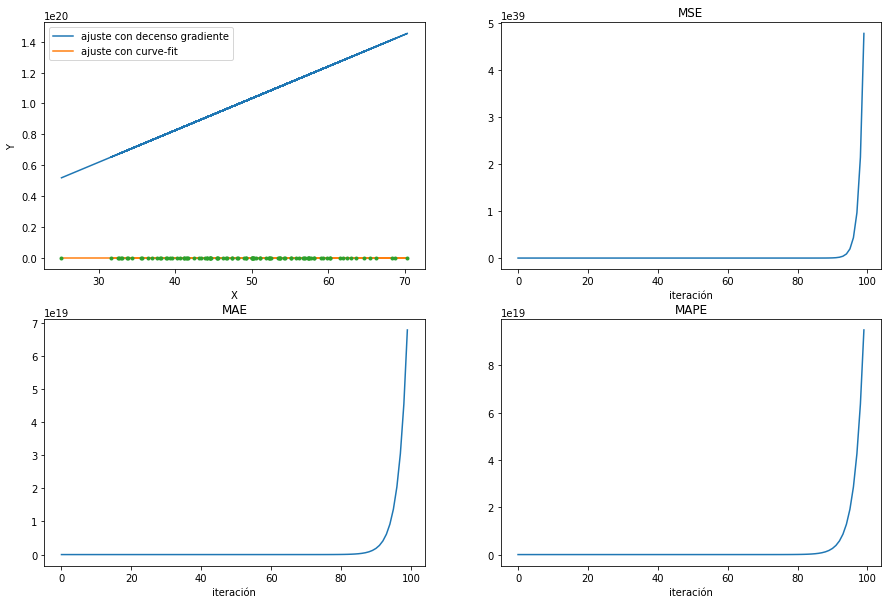

In [11]:
initial=[10,10]
x=np.array(datos['X'])
y=np.array(datos['Y'])

Theta0,Theta1,MAE,MSE,MAPE =decensoGradiente(initial,x,y,epoch=100,alpha=0.001);

print("Los valores finales son Theta0: %.2f y Theta1: %.2f" % (Theta0,Theta1) )

fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(x,x*Theta1+Theta0, label='ajuste con decenso gradiente')
ax[0,0].plot(x,x*popt[1]+popt[0], label='ajuste con curve-fit')
ax[0,0].plot(x,y,".")
ax[1,0].set_title("fit")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")
ax[0,0].legend()

ax[1,0].plot(MAE)
ax[1,0].set_title("MAE")
ax[1,0].set_xlabel("iteración")

ax[0,1].plot(MSE)
ax[0,1].set_title("MSE")
ax[0,1].set_xlabel("iteración")

ax[1,1].plot(MAPE)
ax[1,1].set_title("MAPE")
ax[1,1].set_xlabel("iteración")

### epoch=100000, $\alpha$=0.00001

Los valores finales son Theta0: 9.760674 y Theta1: 1.287649


Text(0.5, 0, 'iteración')

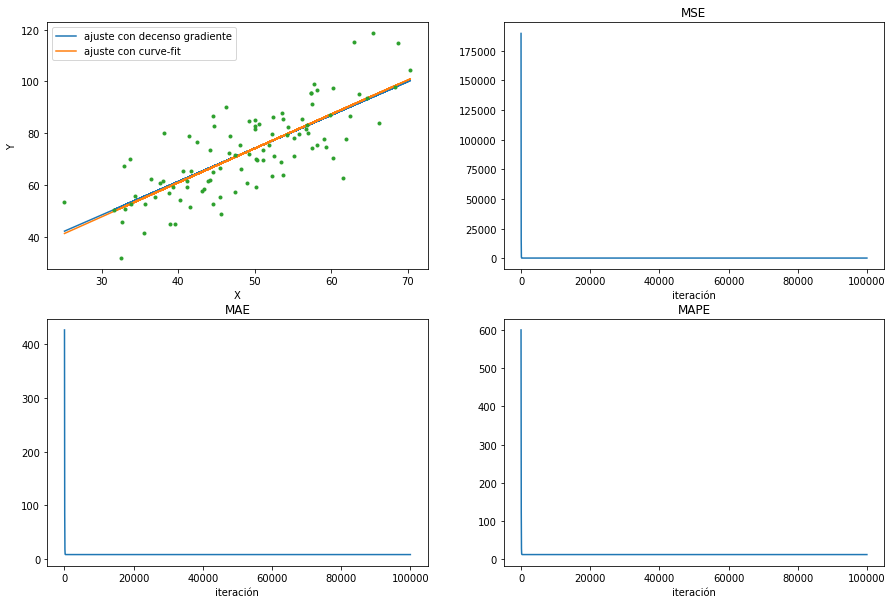

In [12]:
initial=[10,10]
x=np.array(datos['X'])
y=np.array(datos['Y'])

Theta0,Theta1,MAE,MSE,MAPE =decensoGradiente(initial,x,y,epoch=100000,alpha=0.00001);

print("Los valores finales son Theta0: %2f y Theta1: %2f" % (Theta0,Theta1) )

fig,ax=plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(x,x*Theta1+Theta0, label='ajuste con decenso gradiente')
ax[0,0].plot(x,x*popt[1]+popt[0], label='ajuste con curve-fit')
ax[0,0].plot(x,y,".")
ax[1,0].set_title("fit")
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")
ax[0,0].legend()

ax[1,0].plot(MAE)
ax[1,0].set_title("MAE")
ax[1,0].set_xlabel("iteración")

ax[0,1].plot(MSE)
ax[0,1].set_title("MSE")
ax[0,1].set_xlabel("iteración")

ax[1,1].plot(MAPE)
ax[1,1].set_title("MAPE")
ax[1,1].set_xlabel("iteración")

Se observa que los valores de $\alpha$ deben de ser pequeños para que haya una convergencia en el algorítmo.

Se observa que los valores dados por la función curvefit difieren de los valores dados por el método del descenso del gradiente usando como función de pérdida el MSE incluso si se aumenta el número de épocas y se disminue el valor de $\alpha$ para lograr mayor precesión, aunque se observa que estos valores están contenidos en el error del ajuste